# Task IV - Predicting the Distribution of Target Variables using Histograms

In [ ]:
%run Task_I.ipynb

### Task 4.1 
For this task choose the data set X that has been the outcome of pre-processing and outlier removal. For pre-processing chose the method that gives the best results in Task III. For outlier removal, chose a threshold that keeps 99% of the samples in the data set.

In [41]:
#The pre-processing method that gives the best results in Task III is column-wise standardization 
X_KV_columns_scaled = pd.DataFrame(X_KV_columns_scaled)
X_VoD_columns_scaled = pd.DataFrame(X_VoD_columns_scaled) 

In [42]:
#Number of outliers
#Use this function to find the threshold that keeps 99% of the samples in the dataset
def count(features,thr): 
    counter = 0
    features = features.T
    for col in features:
        if any(np.absolute(features[col]) >= thr):
            counter += 1
    return counter

#For dataset JNSM_KV_flashcrowd_1 99% of samples correspond to 9405 samples, i.e. 95 outliers
#Choose threshold 69

#For dataset JNSM_VoD_flashcrowd_1 99% of samples correspond to 17325 samples, i.e. 175 outliers
#Choose threshold 54 which results in 161 outliers 

In [43]:
# Function that removes outliers from the features matrix as well as the target scores
# Note: Input is of the format pd.DataFrame
def outlier_detection(features, labels, thr): 
    features = features.T
    for col in features:
        if any(np.absolute(features[col]) >= thr):
            features = features.drop([col],axis=1)
            labels = labels.drop([col],axis=0)
    return features.T, labels #Returns reduced feature matrix and target scores

In [44]:
X_KV_outlier = outlier_detection(X_KV_columns_scaled, Y_KV['ReadsAvg'], 69)[0]
Y_KV_outlier = outlier_detection(X_KV_columns_scaled, Y_KV['ReadsAvg'], 69)[1]
%store Y_KV_outlier

Stored 'Y_KV_outlier' (Series)


In [45]:
X_VoD_outlier = outlier_detection(X_VoD_columns_scaled, Y_VoD['DispFrames'], 54)[0]
Y_VoD_outlier = outlier_detection(X_VoD_columns_scaled, Y_VoD['DispFrames'], 54)[1]
%store Y_VoD_outlier

Stored 'Y_VoD_outlier' (Series)


In [48]:
#Divide into test and traning set and sort after index
from sklearn.model_selection import train_test_split
X_KV_outlier_train, X_KV_outlier_test, Y_KV_outlier_train, Y_KV_outlier_test = train_test_split(X_KV_outlier, Y_KV_outlier, test_size=0.2, random_state=42)
X_VoD_outlier_train, X_VoD_outlier_test, Y_VoD_outlier_train, Y_VoD_outlier_test = train_test_split(X_VoD_outlier, Y_VoD_outlier, test_size=0.2, random_state=42)

X_KV_outlier_train = X_KV_outlier_train.sort_index(axis=0)
X_KV_outlier_test = X_KV_outlier_test.sort_index(axis=0)
Y_KV_outlier_train = Y_KV_outlier_train.sort_index(axis=0)
Y_KV_outlier_test = Y_KV_outlier_test.sort_index(axis=0)

X_VoD_outlier_train = X_VoD_outlier_train.sort_index(axis=0)
X_VoD_outlier_test = X_VoD_outlier_test.sort_index(axis=0)
Y_VoD_outlier_train = Y_VoD_outlier_train.sort_index(axis=0)
Y_VoD_outlier_test = Y_VoD_outlier_test.sort_index(axis=0)

In [37]:
%store X_KV_outlier_train X_KV_outlier_test Y_KV_outlier_train Y_KV_outlier_test
%store X_VoD_outlier_train X_VoD_outlier_test Y_VoD_outlier_train Y_VoD_outlier_test

Stored 'X_KV_outlier_train' (DataFrame)
Stored 'X_KV_outlier_test' (DataFrame)
Stored 'Y_KV_outlier_train' (Series)
Stored 'Y_KV_outlier_test' (Series)
Stored 'X_VoD_outlier_train' (DataFrame)
Stored 'X_VoD_outlier_test' (DataFrame)
Stored 'Y_VoD_outlier_train' (Series)
Stored 'Y_VoD_outlier_test' (Series)


In [49]:
%store -r X_KV_outlier_train X_KV_outlier_test Y_KV_outlier_train Y_KV_outlier_test
%store -r X_VoD_outlier_train X_VoD_outlier_test Y_VoD_outlier_train Y_VoD_outlier_test

### Task 4.3
In the case of Y representing the Video Frame Rate, the y values are integers, e.g., 15 Frames/sec. Consider the histogram on the interval y ∈ [0.5, 30.5] with a bin size of 1. This results in 30 bins, with mid points 1, 2, .., 30.

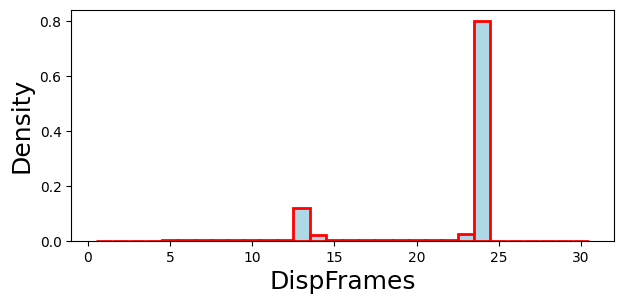

In [63]:
plt.figure(figsize = (7,3))
n_VoD, bins_VoD, patches_VoD = plt.hist(Y_VoD['DispFrames'], bins=30, range=[0.5,30.5], density = True, align='mid', linewidth = 2,color = "lightblue", ec="red")
plt.xlabel('DispFrames',fontsize=18)
plt.ylabel('Density', fontsize = 18)
#plt.savefig('hist_dispframes', bbox_inches='tight')
plt.show()

### Task 4.4 
In the case of Y representing the Response Time, consider the histogram on the interval y ∈ [ymin, ymax] whereby ymin is the minimum y value in the training set and ymax is the maximum y value. Divide this interval into 20 bins of equal size.

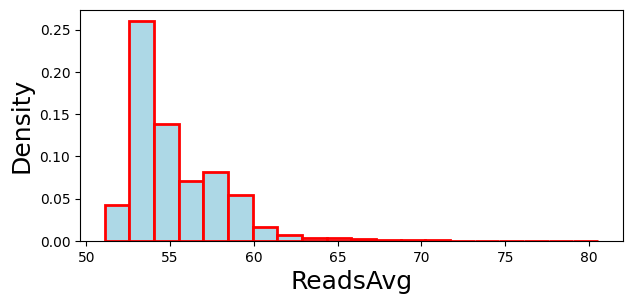

In [62]:
#Find minimum and maximum values y on the training set
y_min = np.min(Y_KV_outlier_train)
y_max = np.max(Y_KV_outlier_train)

plt.figure(figsize = (7,3))
n_KV, bins_KV, patches_KV = plt.hist(Y_KV['ReadsAvg'], bins=20, range=[y_min,y_max], density = True, align='mid', linewidth = 2, color = "lightblue", ec="red")
plt.xlabel('ReadsAvg',fontsize=18)
plt.ylabel('Density', fontsize = 18)
#plt.savefig('hist_readsavg', bbox_inches='tight')
plt.show()

### Task 4.5
Consider each bin of the histogram as a separate class and use a random forest classifier to predict the probability for each class.

In [85]:
from sklearn.ensemble import RandomForestClassifier

#### JNSM_VoD_flashcrowd_1

In [96]:
#Y values are already integers which correspond to the mid points of the bins
#There should only be 30 classes
def classes(features):
    classes = []
    for y in features:
        if y >= bins_VoD[30]: 
            classes.append(30)
        if y <= bins_VoD[0]:
            classes.append(1)
        else: 
            classes.append(y)
    return np.array(classes)

classes_VoD_train = classes(Y_VoD_outlier_train)
classes_VoD_test = classes(Y_VoD_outlier_test)

#Fitting Random Forest Classifier
rand_forest_VoD = RandomForestClassifier(n_estimators=15, max_depth=10)
rand_forest_VoD.fit(X_VoD_outlier_train, np.ravel(Y_VoD_outlier_train))                                                
prediction_VoD = rand_forest_VoD.predict(X_VoD_outlier_test)

#Class probabilities for test and training set
class_prob_VoD_train = rand_forest_VoD.predict_proba(X_VoD_outlier_train)
class_prob_VoD_test = rand_forest_VoD.predict_proba(X_VoD_outlier_test)

#### Dataset JNSM_KV_flashcrowd_1

In [177]:
#Assign each target value a class that is determined by the bins
def classes(features):
    classes = []
    for y in features:
        for i in range(0,20,1):
            if y >= bins_KV[i] and y < bins_KV[i+1]: 
                classes.append((bins_KV[i]+bins_KV[i+1])*0.5)
        if y >= bins_KV[19]:
            classes.append((bins_KV[19]+bins_KV[20])*0.5)
    return np.array(classes)

classes_KV_train = classes(Y_KV_outlier_train)
classes_KV_test = classes(Y_KV_outlier_test)

In [181]:
#Label Encoder
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
classes_KV_train = lab.fit_transform(classes(Y_KV_outlier_train))

#To reverse this execute: classes_KV_train = lab.inverse_transform(classes_KV_train)

In [186]:
rand_forest_KV = RandomForestClassifier(n_estimators=15, max_depth=10)
rand_forest_KV.fit(X_KV_outlier_train, np.ravel(classes_KV_train))                                                
prediction_KV = rand_forest_KV.predict(X_KV_outlier_test)

#Class probabilities for test and training set
class_prob_KV_train = rand_forest_KV.predict_proba(X_KV_outlier_train)
class_prob_KV_test = rand_forest_KV.predict_proba(X_KV_outlier_test)

In [176]:
print(classes_KV_train)
for i in range(0,20,1):
    if np.any((classes_KV_train>=bins_KV[i]) & (classes_KV_train<=bins_KV[i+1])):
        print((i,i+1))

[59.19 57.71 57.71 ... 54.77 56.24 54.77]
(0, 1)
(1, 2)
(2, 3)
(3, 4)
(4, 5)
(5, 6)
(6, 7)
(7, 8)
(8, 9)
(9, 10)
(10, 11)
(11, 12)
(12, 13)
(13, 14)
(14, 15)
(15, 16)
(16, 17)
(19, 20)


In [188]:
print(class_prob_KV_test[1])

[0.33 0.07 0.   0.2  0.27 0.13 0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.  ]


### Task 4.6
To evaluate the accuracy of the method, compute the error of the expected values with respect to the measured values over the test set. Express the error as NMAE. Compare the result with those from Tasks II and III

In [99]:
#For dataset JNSM_VoD_flashcrowd_1 
NMAE_VoD = (1/np.mean(Y_VoD_outlier_test))*mean_absolute_error(prediction_VoD,Y_VoD_outlier_test)
print(NMAE_VoD)

#Task II: Without outlier removal, the NMAE was 0.0614
#Task III: 

0.07023778416514241


In [44]:
#For dataset JNSM_KV_flashcrowd_1 

#Reverse label encoding (Error when running multiple times, have to run code before)
classes_KV_train = lab.inverse_transform(classes_KV_train)
prediction_KV = lab.inverse_transform(prediction_KV)

NMAE_KV = (1/np.mean(Y_KV_outlier_test))*mean_absolute_error(prediction_KV,Y_KV_outlier_test)
print(NMAE_KV)

#Task II: Without outlier removal, the NMAE was 0.0178
#Task III: For a threshold of 69 the NMAE was approx. 0.016 < 0.019 

0.019091090016064093


### Task 4.7
For illustration purposes, chose two x-samples from the test set and draw the two predicted histograms. For both histograms indicate the measured y-values.

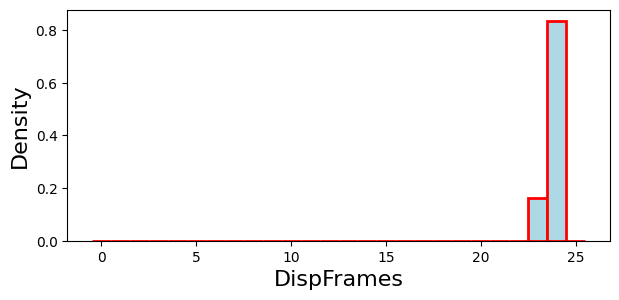

Measured y-value: 12


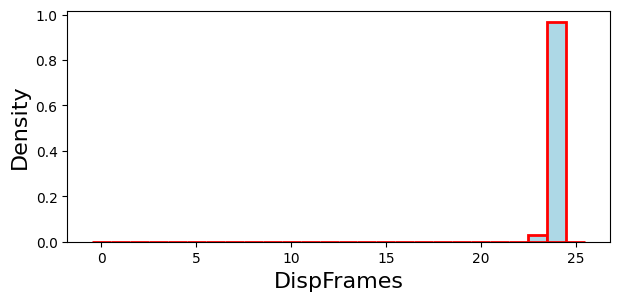

Measured y-value: 24


In [102]:
#For dataset JNSM_VoD_flashcrowd_1 

#First two samples
samples_VoD = X_VoD_outlier_test.iloc[0:2,:]
samples_VoD_class_prob = rand_forest_VoD.predict_proba(samples_VoD)


#Plots
labels = np.arange(0,26,1)

plt.figure(figsize = (7,3))
plt.bar(labels,samples_VoD_class_prob[0], width=1,align='center', linewidth=2, color = "lightblue", ec="red")
plt.xlabel('DispFrames',fontsize=16)
plt.ylabel('Density',fontsize=16)
#plt.title('Dataset JNSM_VoD_flashcrowd_1')
#plt.savefig('sample1_VoD', bbox_inches='tight')
plt.show()

print('Measured y-value: %s' %Y_VoD_outlier_test.iloc[0])

plt.figure(figsize = (7,3))
plt.bar(labels,samples_VoD_class_prob[1], width=1,align='center', linewidth=2, color = "lightblue", ec="red")
plt.xlabel('DispFrames',fontsize=16)
plt.ylabel('Density',fontsize=16)
#plt.title('Dataset JNSM_VoD_flashcrowd_1')
#plt.savefig('sample2_VoD', bbox_inches='tight')
plt.show()

print('Measured y-value: %s' %Y_VoD_outlier_test.iloc[1])

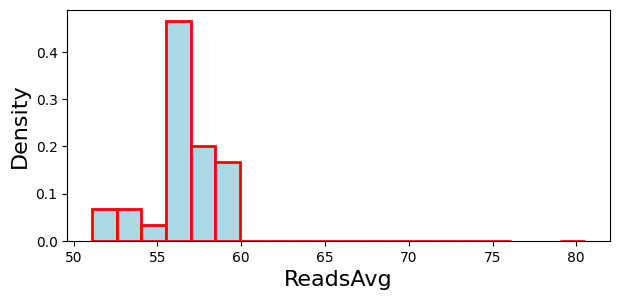

Measured y-value: 58.4944


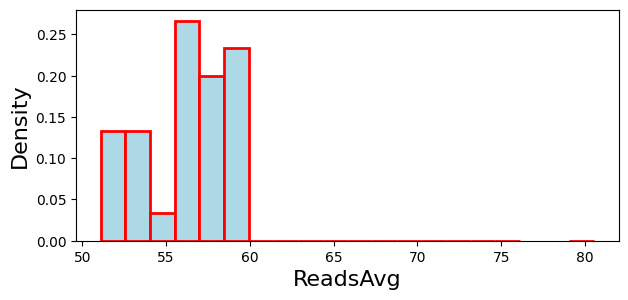

Measured y-value: 59.9823


In [136]:
#For dataset JNSM_KV_flashcrowd_1 

#First two samples
samples_KV = X_KV_outlier_test.iloc[0:2,:]
samples_KV_class_prob = rand_forest_KV.predict_proba(samples_KV)


#Plots
labels = lab.inverse_transform(np.arange(0,18,1))

plt.figure(figsize = (7,3))
plt.bar(labels,samples_KV_class_prob[0], width=labels[1]-labels[0],align='center', linewidth=2, color = "lightblue", ec="red")
plt.xlabel('ReadsAvg', fontsize=16)
plt.ylabel('Density', fontsize=16)
#plt.title('Dataset JNSM_KV_flashcrowd_1')
plt.savefig('sample1_KV', bbox_inches='tight')
plt.show()

print('Measured y-value: %s' %Y_KV_outlier_test.iloc[0])

plt.figure(figsize = (7,3))
plt.bar(labels,samples_KV_class_prob[1], width=labels[1]-labels[0],align='center', linewidth=2, color = "lightblue", ec="red")
plt.xlabel('ReadsAvg', fontsize=16)
plt.ylabel('Density', fontsize=16)
#plt.title('Dataset JNSM_KV_flashcrowd_1')
plt.savefig('sample2_KV', bbox_inches='tight')
plt.show()

print('Measured y-value: %s' %Y_KV_outlier_test.iloc[1])